In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [24]:
# 변수 정의
총상차_대수 = 60
대당_상차시간 = 30  # 분
일_상차_시간 = 총상차_대수 * 대당_상차시간  # 분

인당_작업능력 = 420  # 분
작업_인원수 = 일_상차_시간 / 인당_작업능력

일_인건비 = 65000  # 원
총작업_인건비 = 작업_인원수 * 일_인건비

대당_평균_적재량 = 300  # 박스
총제품_상차량 = 총상차_대수 * 대당_평균_적재량

단위_박스당_원단위 = 총작업_인건비 / 총제품_상차량


In [25]:
# 데이터프레임 생성
df1 = pd.DataFrame({
    "총상차 대수": [총상차_대수],
    "대당 상차시간": [대당_상차시간],
    "일 상차 시간": [일_상차_시간],
    "인당 작업능력": [인당_작업능력],
    "작업 인원수": [작업_인원수],
    "일 인건비": [일_인건비],
    "총작업 인건비": [총작업_인건비],
    "대당 평균 적재량": [대당_평균_적재량],
    "총제품 상차량": [총제품_상차량],
    "단위 박스당 원단위": [단위_박스당_원단위]
})

df1


,총상차 대수,대당 상차시간,일 상차 시간,인당 작업능력,작업 인원수,일 인건비,총작업 인건비,대당 평균 적재량,총제품 상차량,단위 박스당 원단위
0,60,30,1800,420,4.285714,65000,278571.428571,300,18000,15.47619


In [26]:
제품별 = ["A", "B", "C"]
상차량_비율 = [0.40, 0.30, 0.30]

df2 = pd.DataFrame({
    "제품": 제품별,
    "상차량 비율": 상차량_비율
})

df2

,제품,상차량 비율
0,A,0.4
1,B,0.3
2,C,0.3


In [27]:
print(f"총제품 상차량: {총제품_상차량}")
print(f"단위 박스당 원단위: {단위_박스당_원단위:.2f}")

총제품 상차량: 18000
단위 박스당 원단위: 15.48


In [28]:
df2["상차량"] = df2["상차량 비율"]* 총제품_상차량
df2["단순 상차 금액"] = (df2["상차량"] * 단위_박스당_원단위).round(0)

df2

,제품,상차량 비율,상차량,단순 상차 금액
0,A,0.4,7200.0,111429.0
1,B,0.3,5400.0,83571.0
2,C,0.3,5400.0,83571.0


In [29]:
소계 = pd.DataFrame({
    "제품": ["소계"],
    "상차량 비율": [df2["상차량 비율"].sum()],
    "상차량": [df2["상차량"].sum()],
    "단순 상차 금액": [df2["단순 상차 금액"].sum()]
})

df2 = pd.concat([df2, 소계], ignore_index=True)
df2

,제품,상차량 비율,상차량,단순 상차 금액
0,A,0.4,7200.0,111429.0
1,B,0.3,5400.0,83571.0
2,C,0.3,5400.0,83571.0
3,소계,1.0,18000.0,278571.0


In [30]:
# 무게비율 및 무게환산 상차량
무게비율 = [4.0, 1.0, 0.2]
df2.loc[0:2, "무게비율"] = 무게비율
df2.loc[0:2, "무게환산 상차량"] = (df2.loc[0:2, "상차량"] * df2.loc[0:2, "무게비율"]).round(1)
df2.loc[3, "무게환산 상차량"] = df2.loc[0:2, "무게환산 상차량"].sum()

df2

,제품,상차량 비율,상차량,단순 상차 금액,무게비율,무게환산 상차량
0,A,0.4,7200.0,111429.0,4.0,28800.0
1,B,0.3,5400.0,83571.0,1.0,5400.0
2,C,0.3,5400.0,83571.0,0.2,1080.0
3,소계,1.0,18000.0,278571.0,NaN,35280.0


In [35]:
# df1에 무게가중원단위 추가
df1["무게가중원단위"] = (df1["총작업 인건비"].iloc[0] / df2.loc[3, "무게환산 상차량"]).round(0)
무게가중원단위 = df1["무게가중원단위"].iloc[0]
df1

,총상차 대수,대당 상차시간,일 상차 시간,인당 작업능력,작업 인원수,일 인건비,총작업 인건비,대당 평균 적재량,총제품 상차량,단위 박스당 원단위,무게가중원단위
0,60,30,1800,420,4.285714,65000,278571.428571,300,18000,15.47619,8.0


In [36]:
# df2에 무게 가중 상차비 열 추가
df2["무게 가중 상차비"] = (df2["무게환산 상차량"] * 무게가중원단위).round(0)
df2

,제품,상차량 비율,상차량,단순 상차 금액,무게비율,무게환산 상차량,무게 가중 상차비
0,A,0.4,7200.0,111429.0,4.0,28800.0,230400.0
1,B,0.3,5400.0,83571.0,1.0,5400.0,43200.0
2,C,0.3,5400.0,83571.0,0.2,1080.0,8640.0
3,소계,1.0,18000.0,278571.0,NaN,35280.0,282240.0


In [37]:
final_df = df2[["단순 상차 금액", "무게 가중 상차비"]]
final_df

,단순 상차 금액,무게 가중 상차비
0,111429.0,230400.0
1,83571.0,43200.0
2,83571.0,8640.0
3,278571.0,282240.0


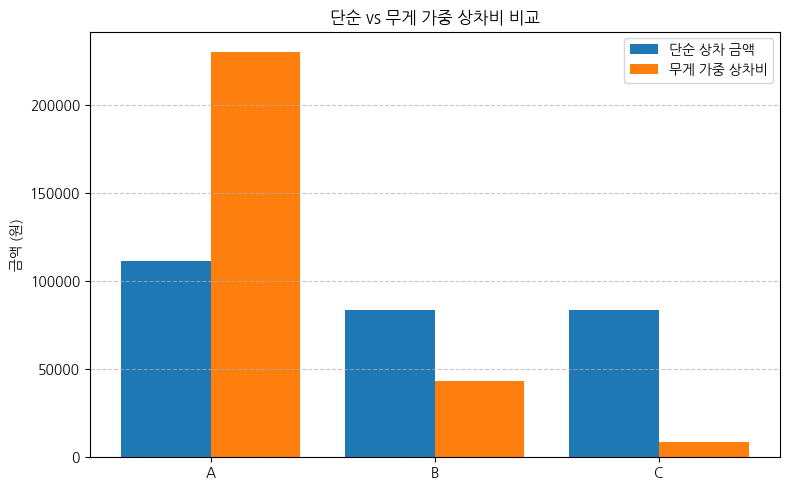

In [38]:
# 소계 제외 (마지막 행)
data = final_df.iloc[0:3]

labels = df2["제품"].iloc[0:3]
단순 = data["단순 상차 금액"]
무게가중 = data["무게 가중 상차비"]

x = range(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x, 단순, width=0.4, label='단순 상차 금액', align='center')
plt.bar([p + 0.4 for p in x], 무게가중, width=0.4, label='무게 가중 상차비', align='center')

plt.xticks([p + 0.2 for p in x], labels)
plt.ylabel("금액 (원)")
plt.title("단순 vs 무게 가중 상차비 비교")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()